In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls

drive  sample_data


In [3]:
import os
os.chdir("./drive/MyDrive/Colab Notebooks")

In [4]:
import pandas as pd
df = pd.read_csv('./bank-direct-marketing.csv', sep = ';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
"""
Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric)
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

"""

'\nInput variables:\n   # bank client data:\n   1 - age (numeric)\n   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",\n                                       "blue-collar","self-employed","retired","technician","services")\n   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)\n   4 - education (categorical: "unknown","secondary","primary","tertiary")\n   5 - default: has credit in default? (binary: "yes","no")\n   6 - balance: average yearly balance, in euros (numeric)\n   7 - housing: has housing loan? (binary: "yes","no")\n   8 - loan: has personal loan? (binary: "yes","no")\n   # related with the last contact of the current campaign:\n   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")\n  10 - day: last contact day of the month (numeric)\n  11 - month: last contact month of year (categorical: "jan", "feb", "

In [8]:
#df['default'] = df['default'].replace('yes', 1)
#df['default'] = df['default'].replace('no', 0)

#df['housing'] = df['housing'].replace('yes', 1)
#df['housing'] = df['housing'].replace('no', 0)

#df['loan'] = df['loan'].replace('yes', 1)
#df['loan'] = df['loan'].replace('no', 0)

df['y'] = df['y'].replace('yes', 1)
df['y'] = df['y'].replace('no', 0)


In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [10]:
null_value_percentage = (df.isnull().sum()/df.shape[0])*100
null_value_percentage.sort_values(ascending = False)

age               0.0
campaign          0.0
nr.employed       0.0
euribor3m         0.0
cons.conf.idx     0.0
cons.price.idx    0.0
emp.var.rate      0.0
poutcome          0.0
previous          0.0
pdays             0.0
duration          0.0
job               0.0
day_of_week       0.0
month             0.0
contact           0.0
loan              0.0
housing           0.0
default           0.0
education         0.0
marital           0.0
y                 0.0
dtype: float64

In [11]:
df.agg(['count','size','nunique'])


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
size,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
nunique,78,12,4,8,3,3,3,2,10,5,...,42,27,8,3,10,26,26,316,11,2


In [12]:
cat_cols = [df.columns[i]
            for i in range(1, df.shape[1]-1)
            if df.iloc[:,i].dtype=='O']

cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [13]:
features = df.columns
num_cols = [c for c in features if c not in cat_cols]
num_cols


['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

##Categorical Analysis
###checking for univariate analysis

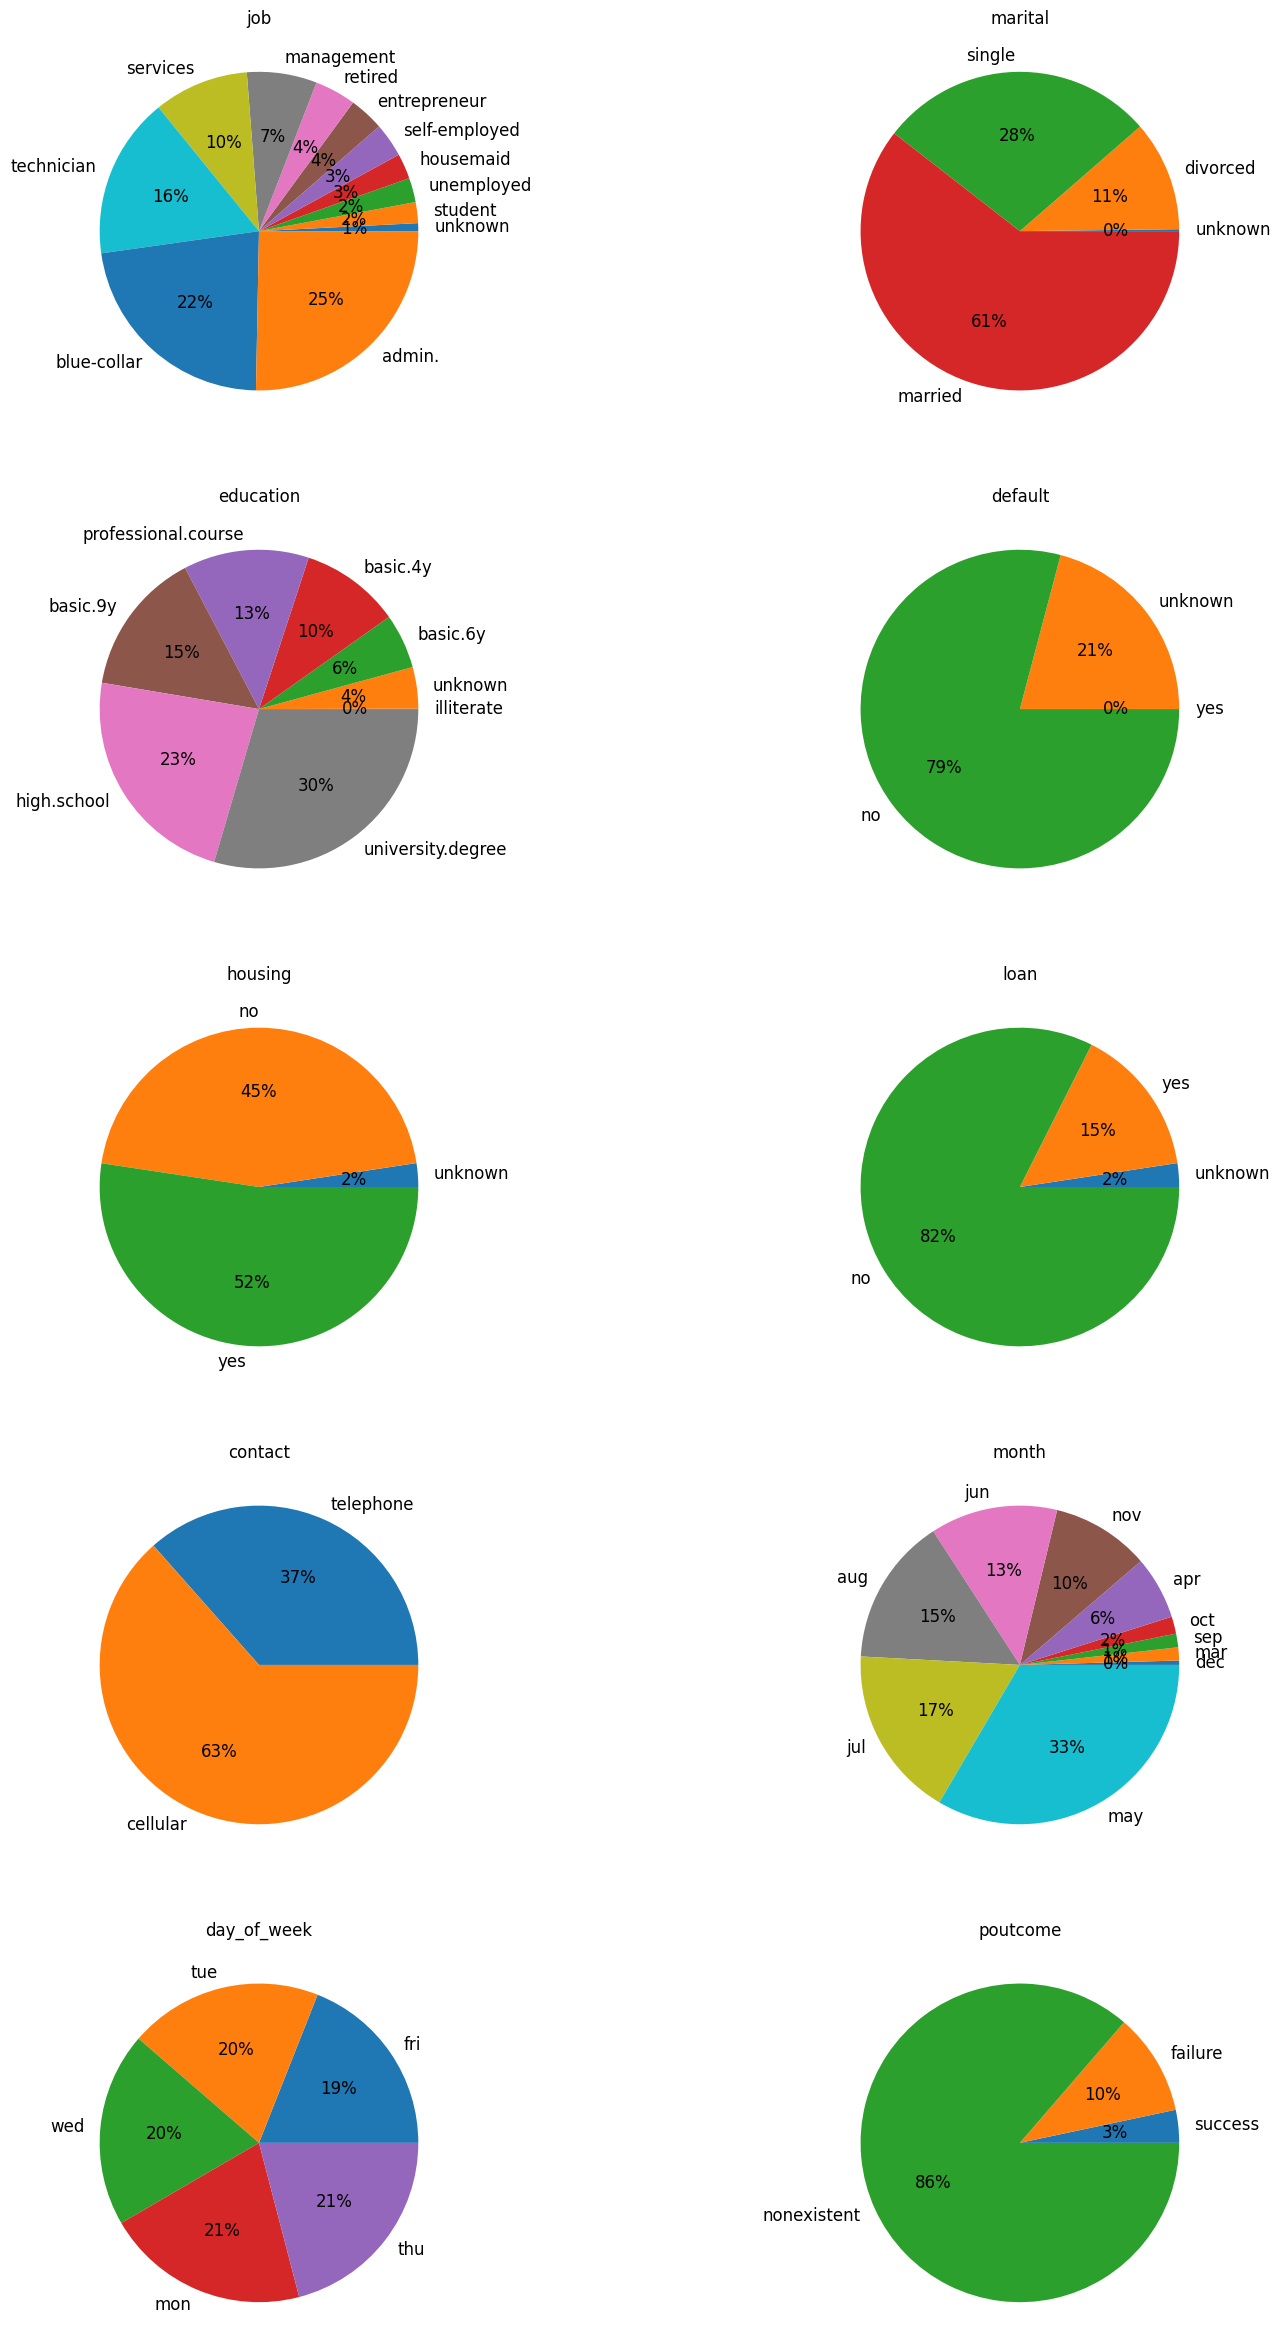

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(5, 2, figsize=(18,30))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(df[cat_cols]):
    df[c].value_counts()[::-1].plot(kind='pie',
                                          ax=axes[i],
                                          title=c,
                                          autopct='%.0f%%',
                                          fontsize=12)
    axes[i].set_ylabel('')

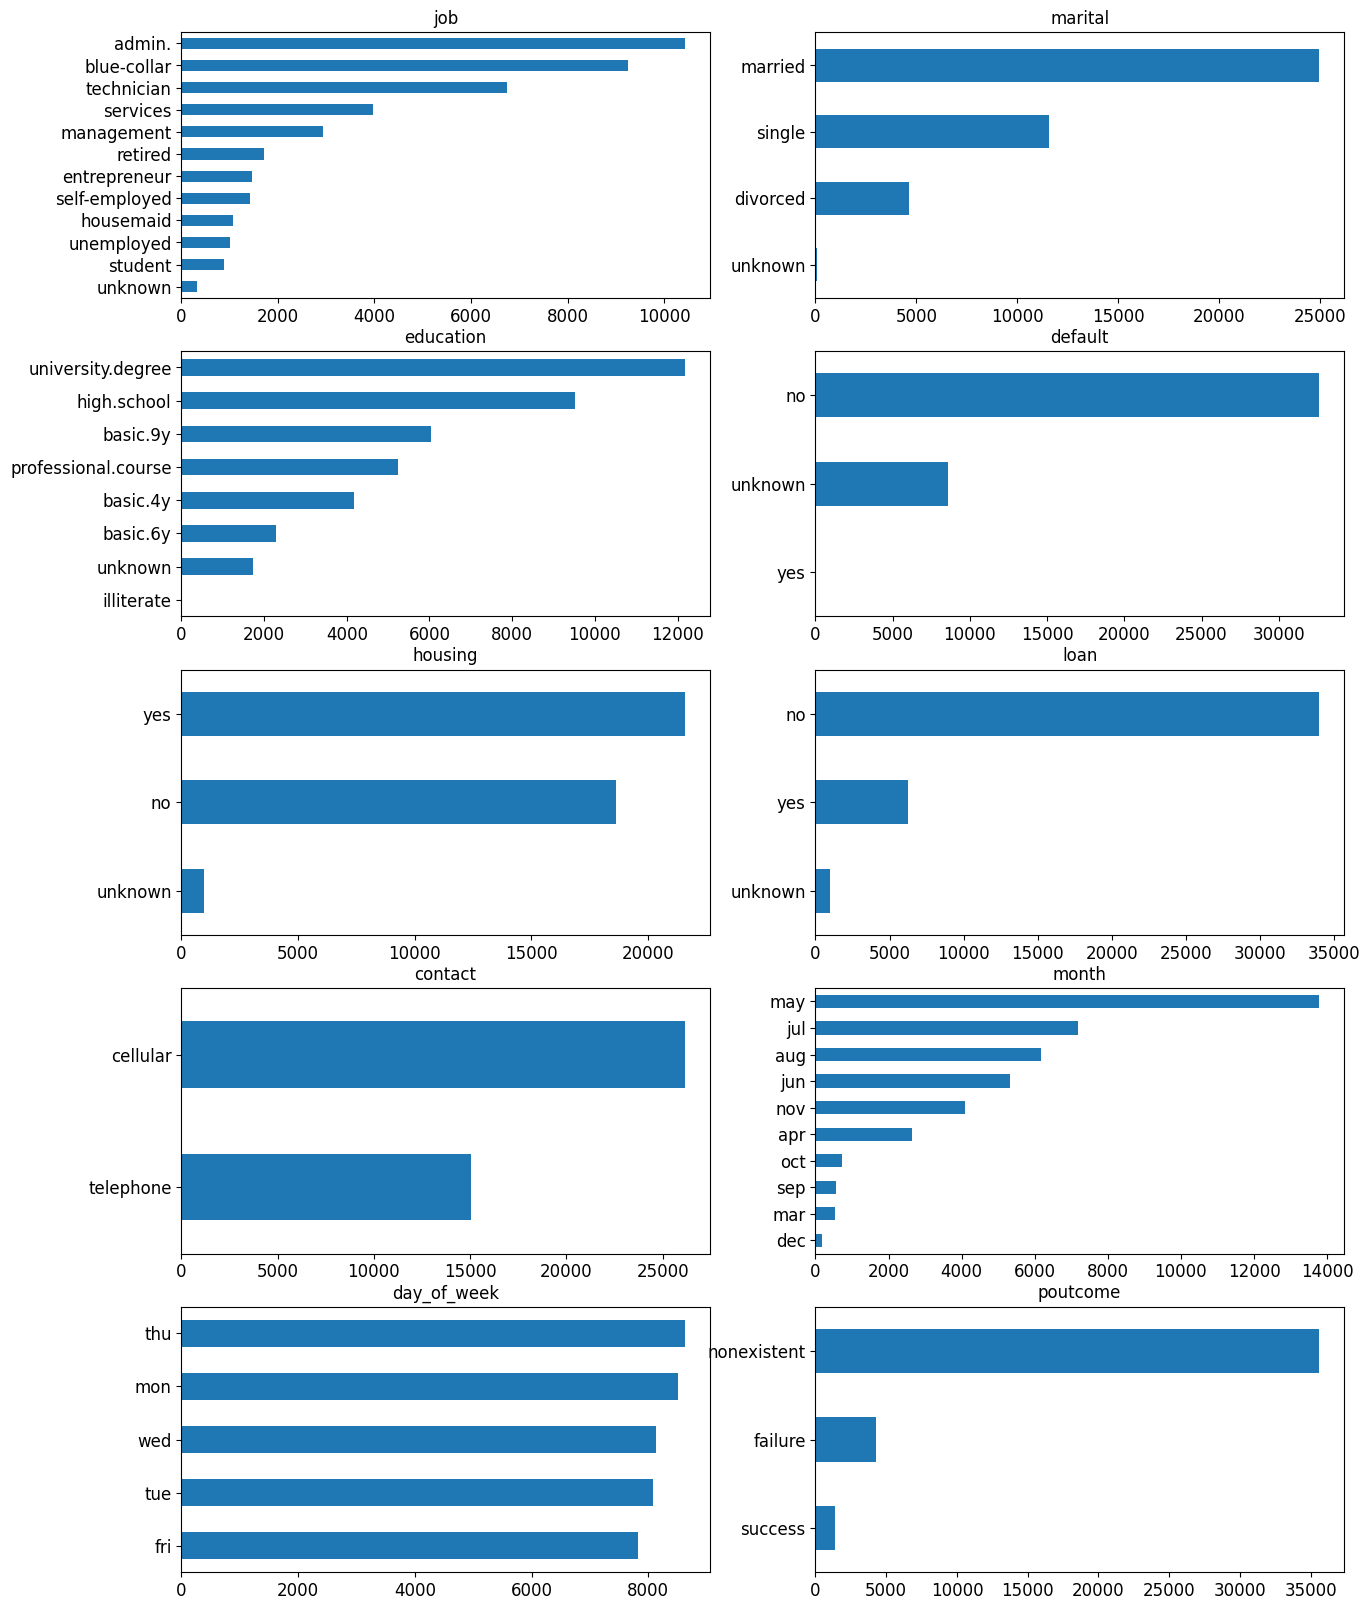

In [15]:
fig, axes = plt.subplots(5, 2, figsize=(15,20))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(df[cat_cols]):
    df[c].value_counts()[::-1].plot(kind='barh',
                                          ax=axes[i],
                                          title=c,
                                          fontsize=12)

###Checking With Target Variable - categorical bivariate

In [16]:
#vc_a.head()

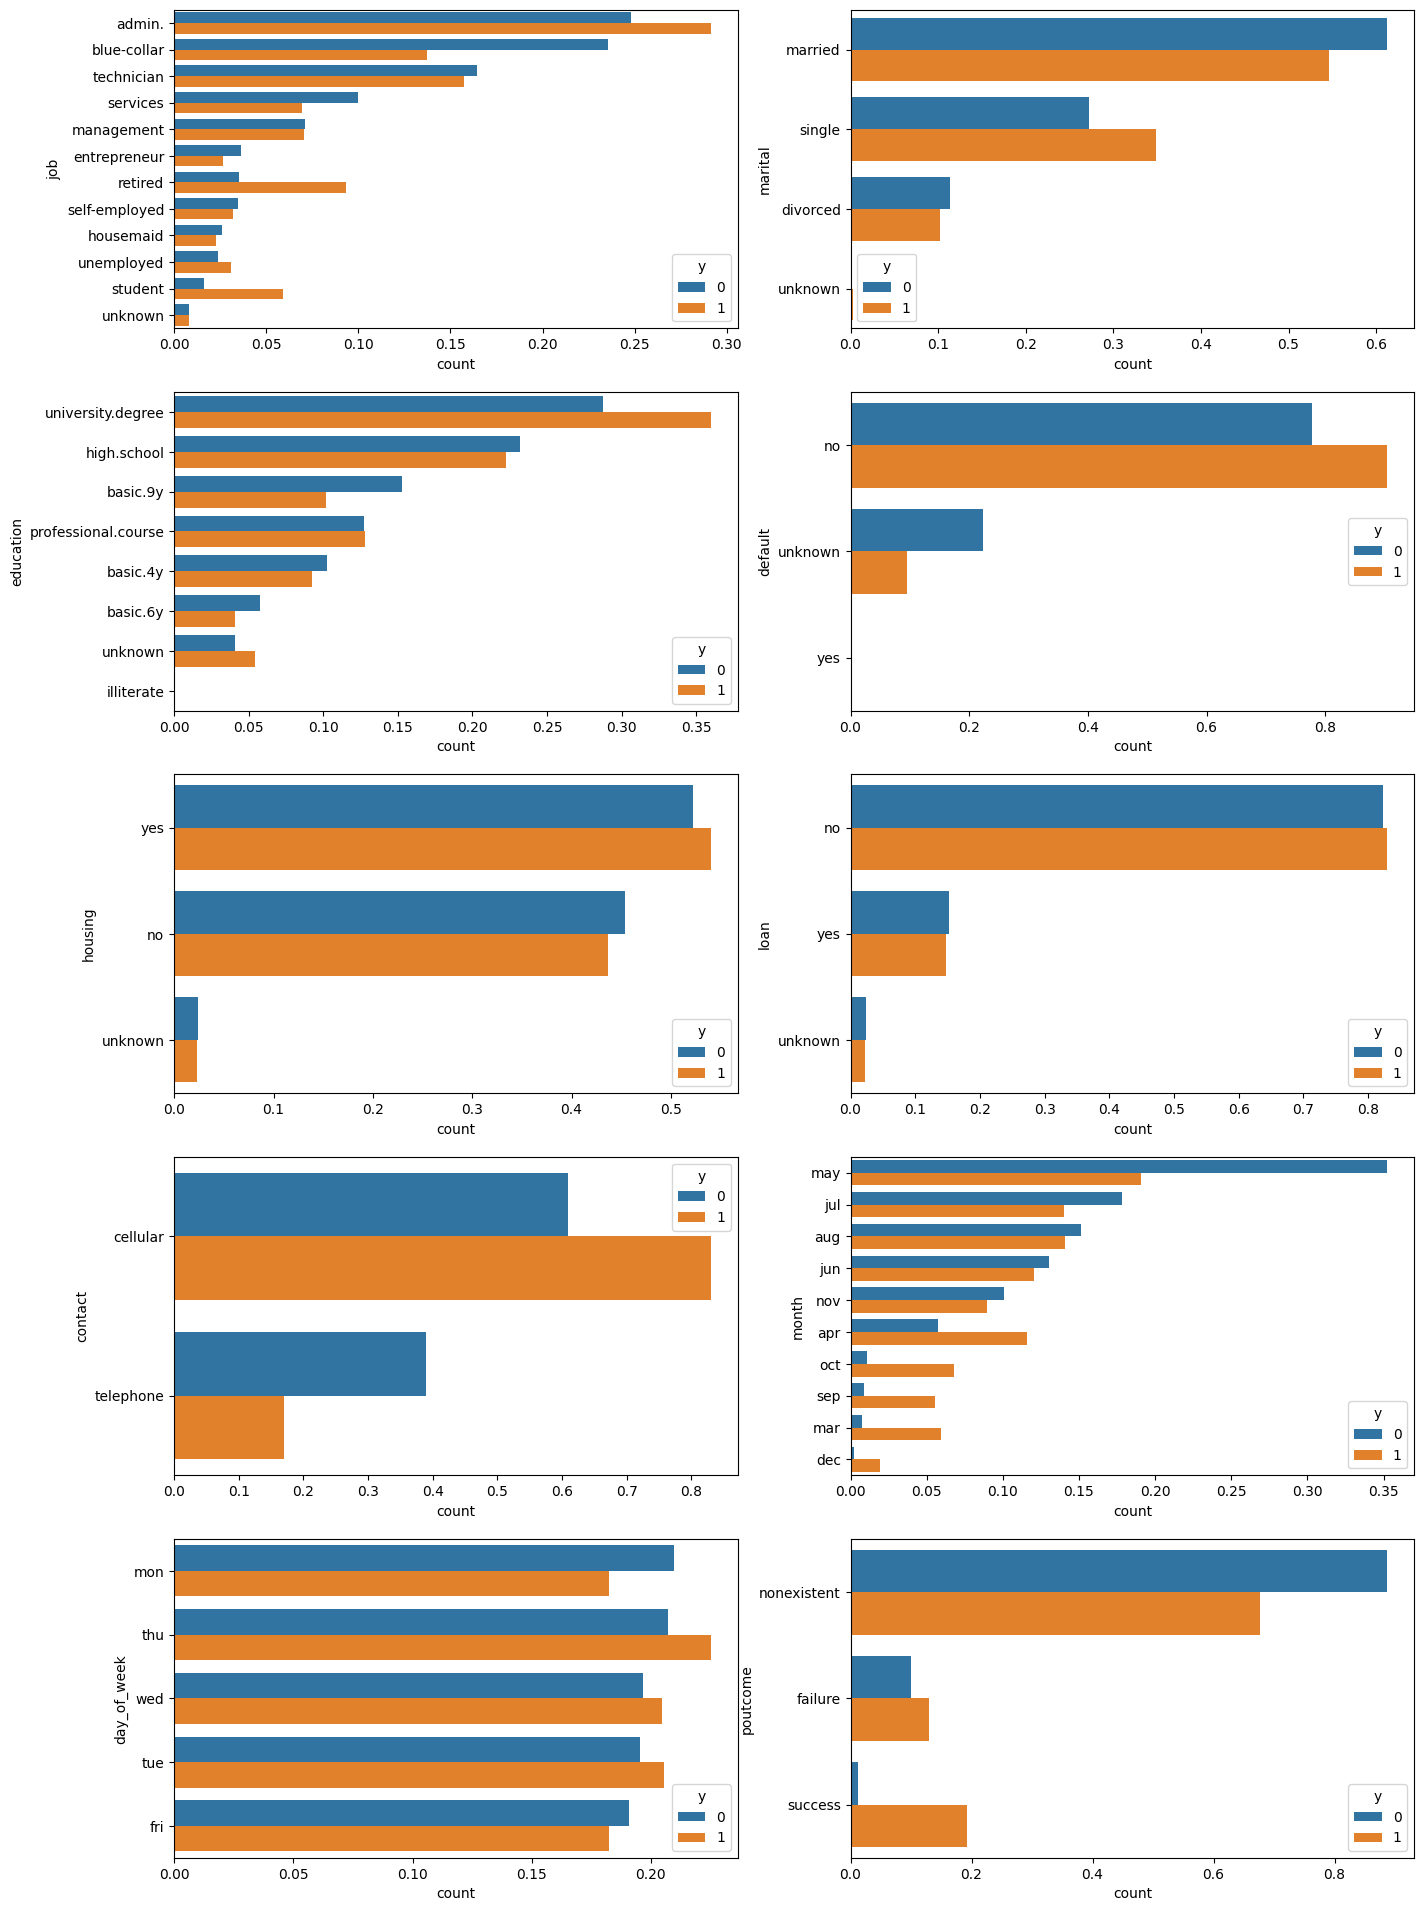

In [17]:
import seaborn as sns
fig, axes = plt.subplots(5, 2, figsize=(16,24))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(df[cat_cols]):
    #index of rows where target_col value is 0
    fltr = df['y']==0

    #dataframe conraining rows and columns where target_col value is 0
    #fltr-index of rows where target_col value is 0
    #c-column name
    #taking the value count
    #resetting index as column name
    vc_a=df[fltr][c].value_counts(normalize=True).reset_index().rename({'index':c,c:'count'}, axis=1)

    #dataframe conraining rows and columns where target_col value is 1
    vc_b=df[~fltr][c].value_counts(normalize=True).reset_index().rename({'index':c,c:'count'}, axis=1)

    #setting target_col value to 0 and 1 respectively
    vc_a['y']=0
    vc_b['y']=1

    #combining into single dataframe
    df1 = pd.concat([vc_a, vc_b]).reset_index(drop=True)

    #plotting
    sns.barplot(y=c, x='count', data=df1, hue='y', ax=axes[i])

##Numerical Analysis
###Univariate

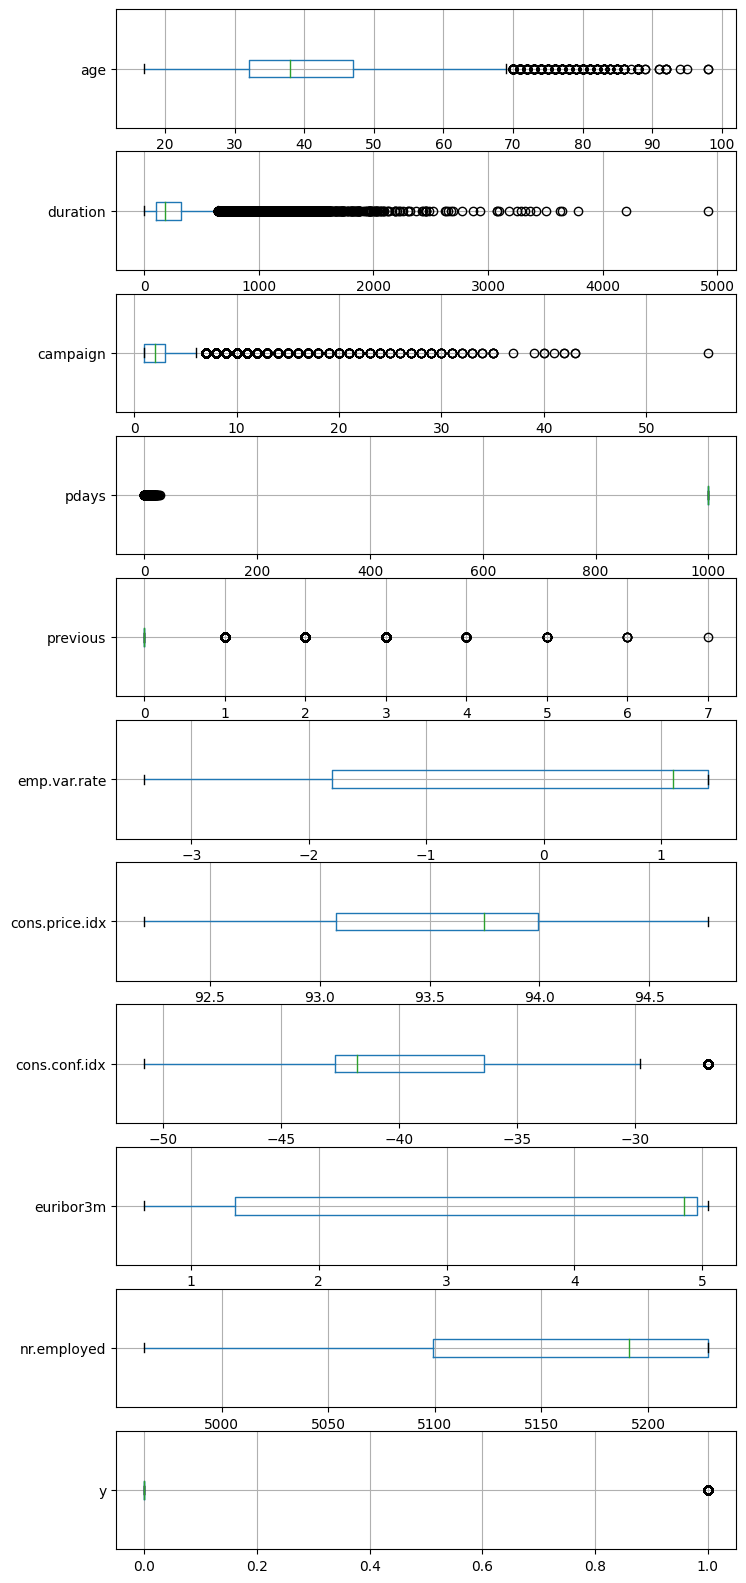

In [18]:
from matplotlib.patches import Polygon
import seaborn as sns



fig, axes = plt.subplots(len(num_cols),1,figsize=(8,20))
for i,c in enumerate(df[num_cols]):
    df[[c]].boxplot(ax=axes[i], vert=False)


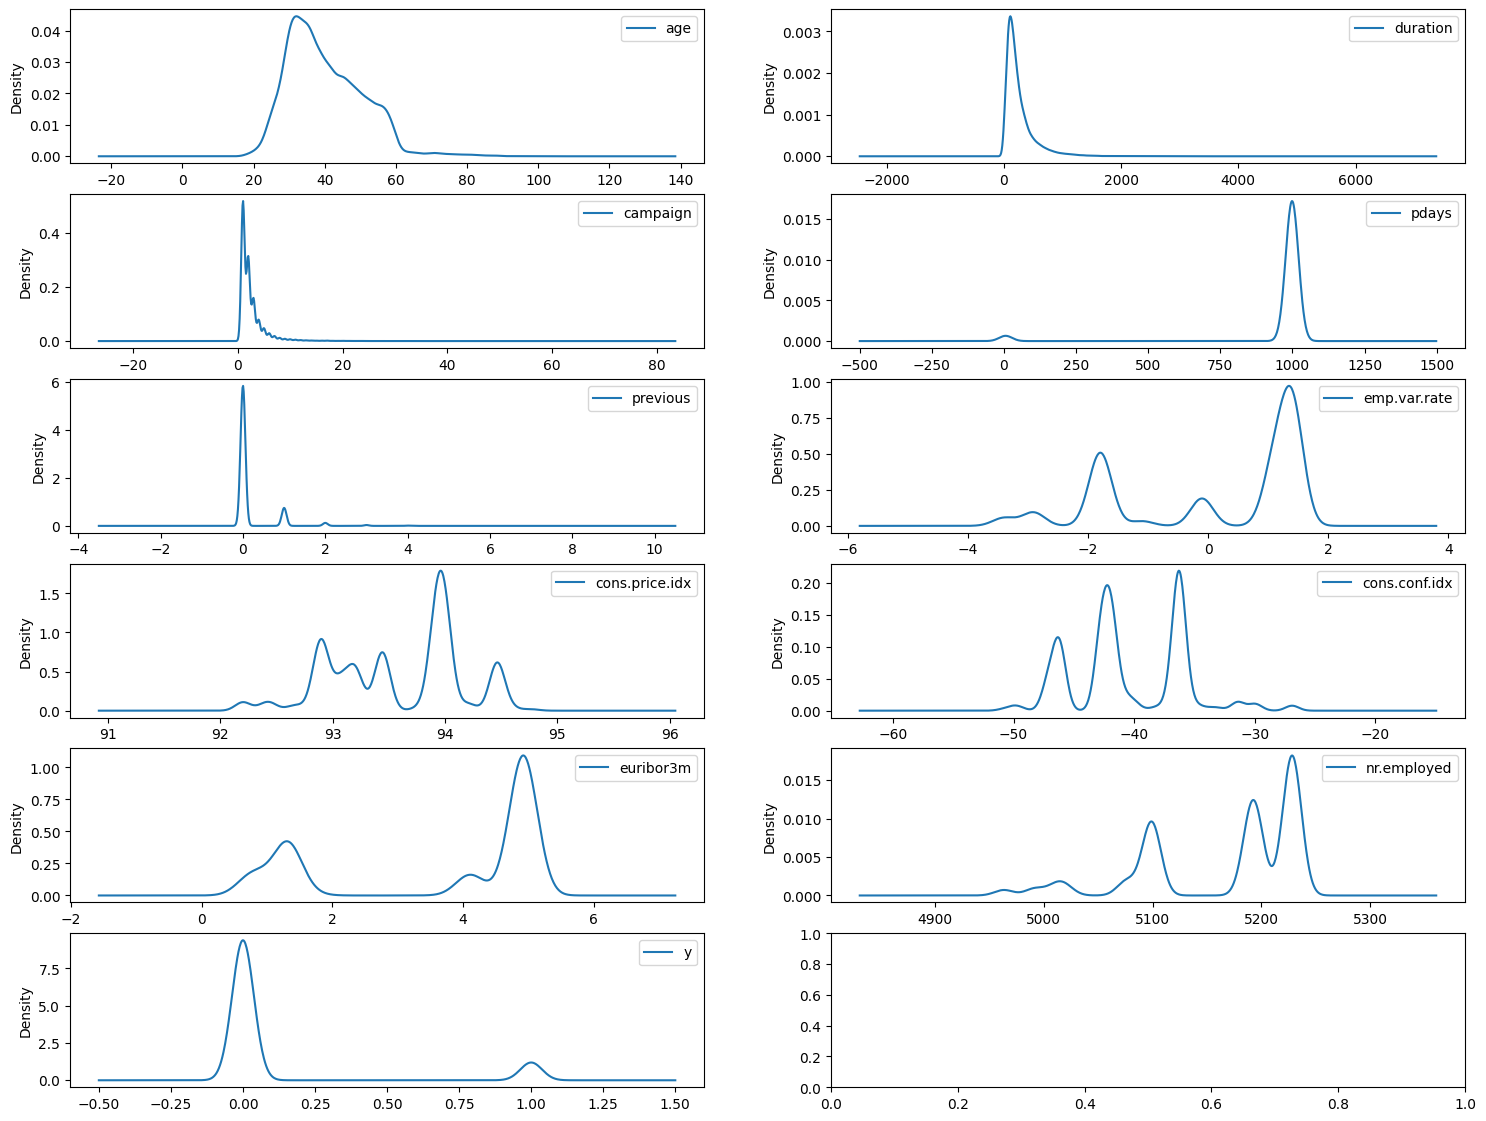

In [19]:
fig, axes = plt.subplots(6, 2, figsize=(18,14))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(num_cols):
    plot = df[[c]].plot(kind='kde', ax=axes[i])

##Numerical
###Bivariate against target

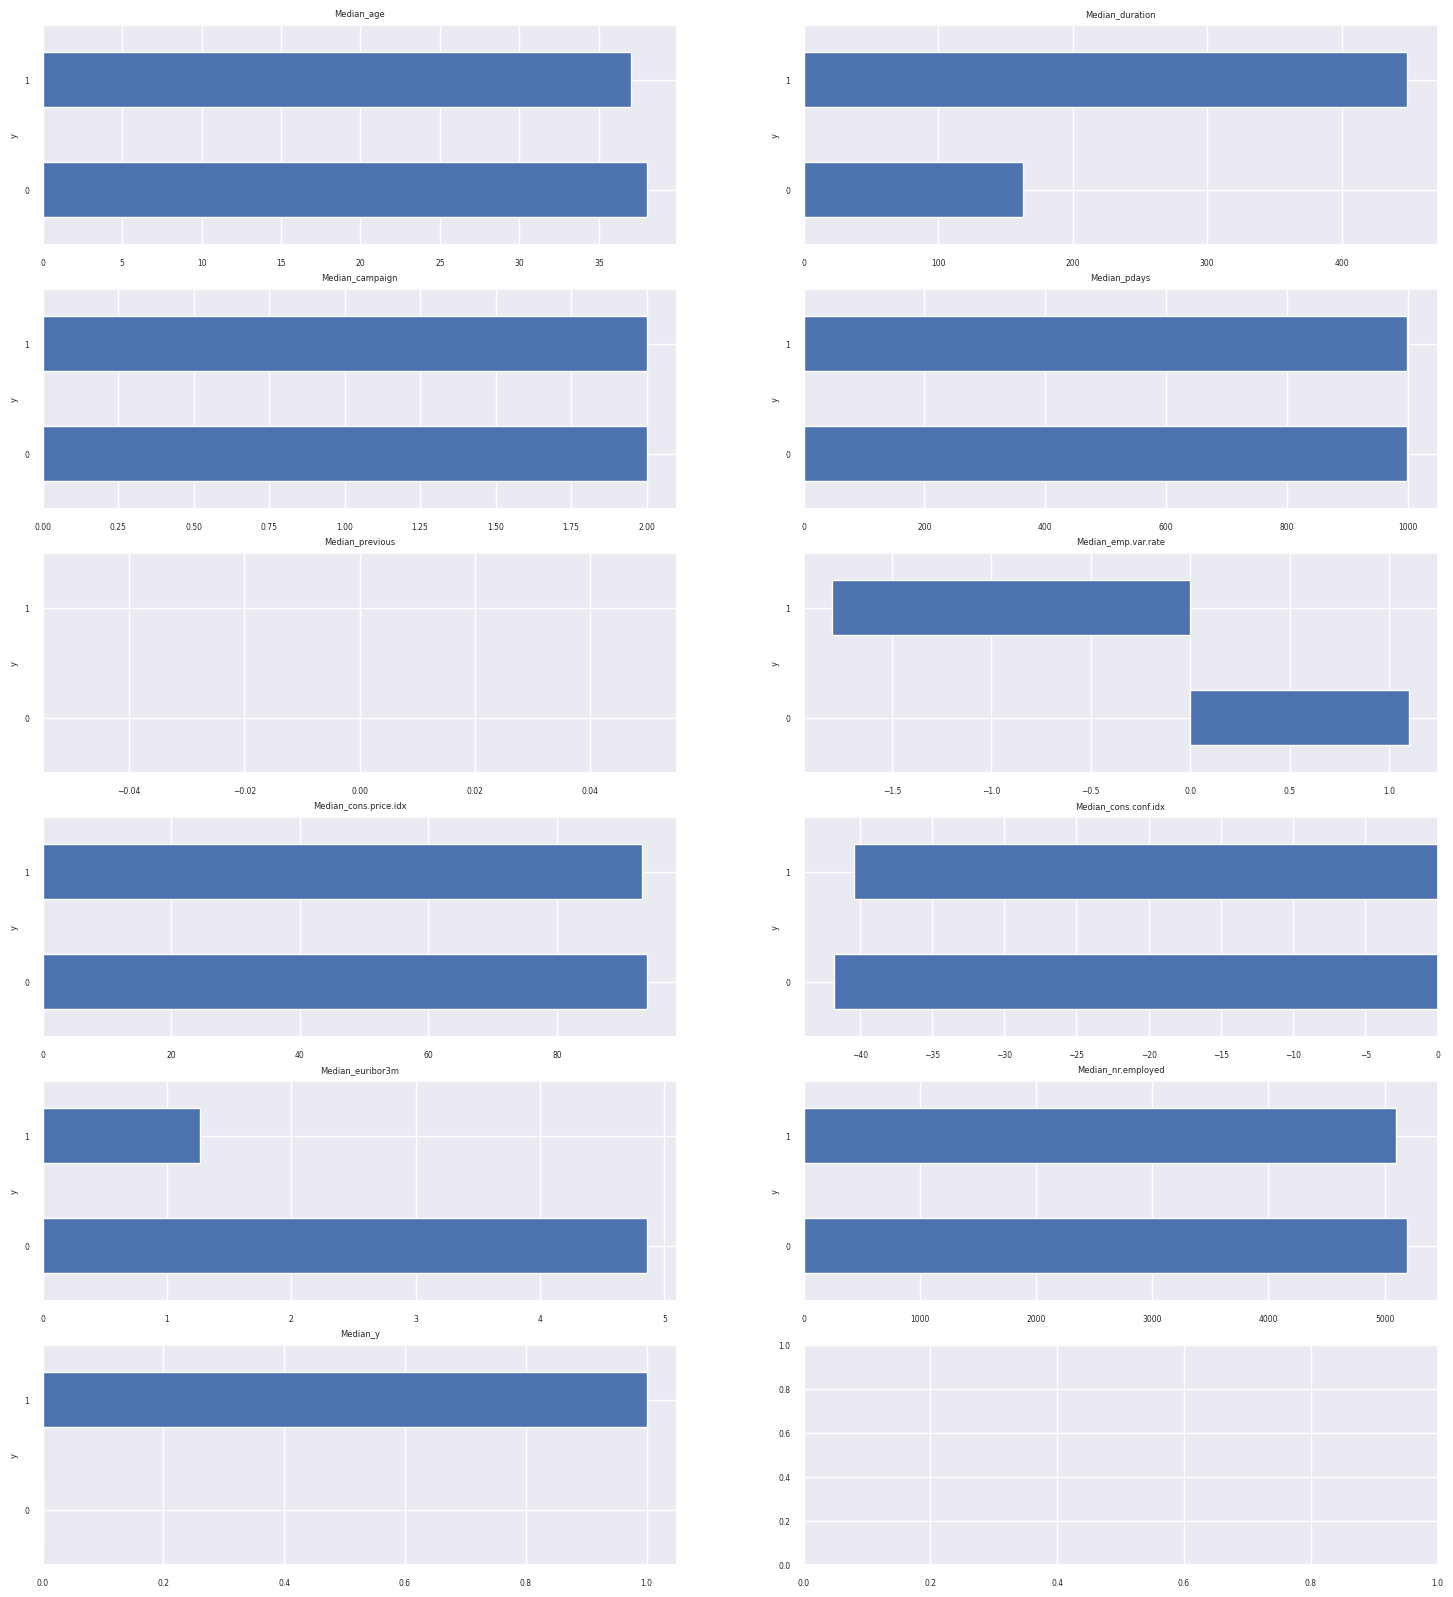

In [20]:
sns.set(font_scale=0.5)
fig, axes = plt.subplots(6, 2, figsize=(18, 20))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(num_cols):
    df.groupby('y')[c].median().plot(kind = 'barh', title=f'Median_{c}', ax=axes[i])

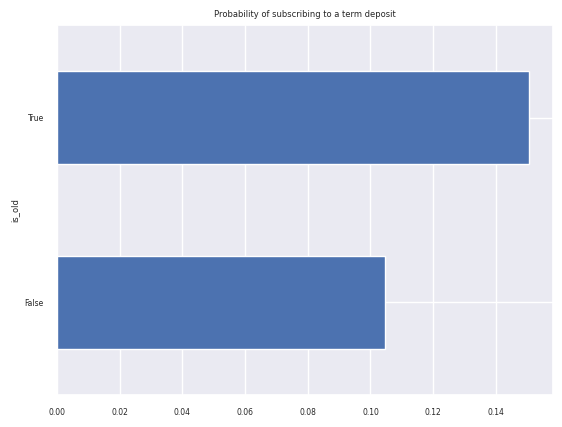

In [21]:
#create a new column called is_old and fill with true
df['is_old'] = True

#in each row see of age is less 50
#if yes make old_age value as False fo that row
df.loc[df['age'] <= 50, 'is_old'] = False

#group by old_age and plot the count
_ = df.groupby('is_old')['y'].mean().sort_values().plot(kind = 'barh', title='Probability of subscribing to a term deposit')

In [22]:
df=df.drop(['is_old'],axis=1)


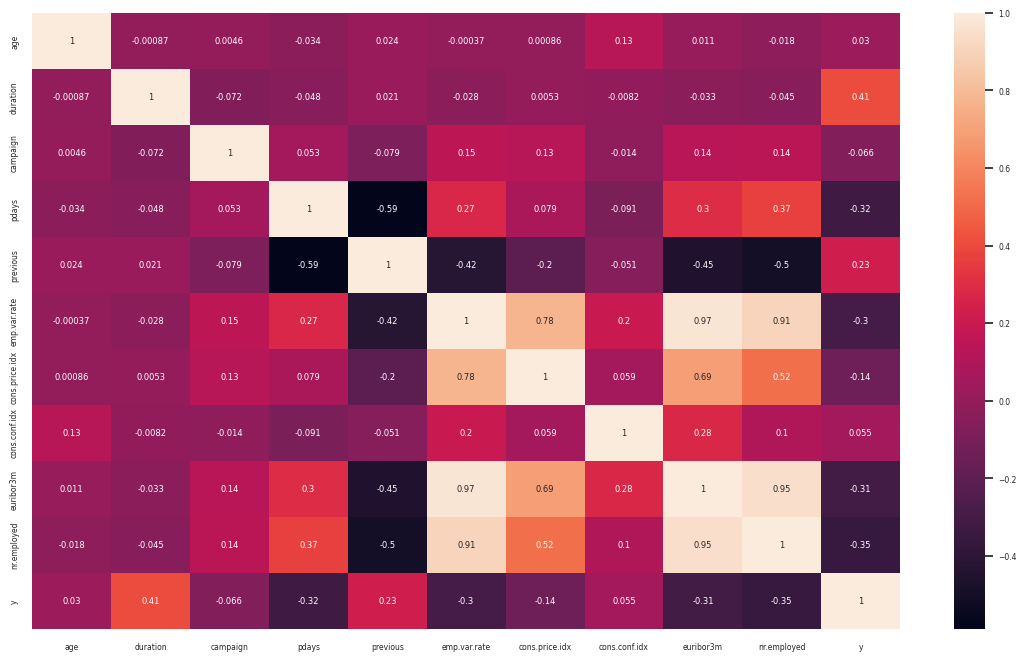

In [23]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(df[num_cols].corr(), annot=True)

<ipython-input-24-668308f6a037>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr(), dtype=np.bool)
<ipython-input-24-668308f6a037>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)
<ipython-input-24-668308f6a037>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this wa

<Axes: >

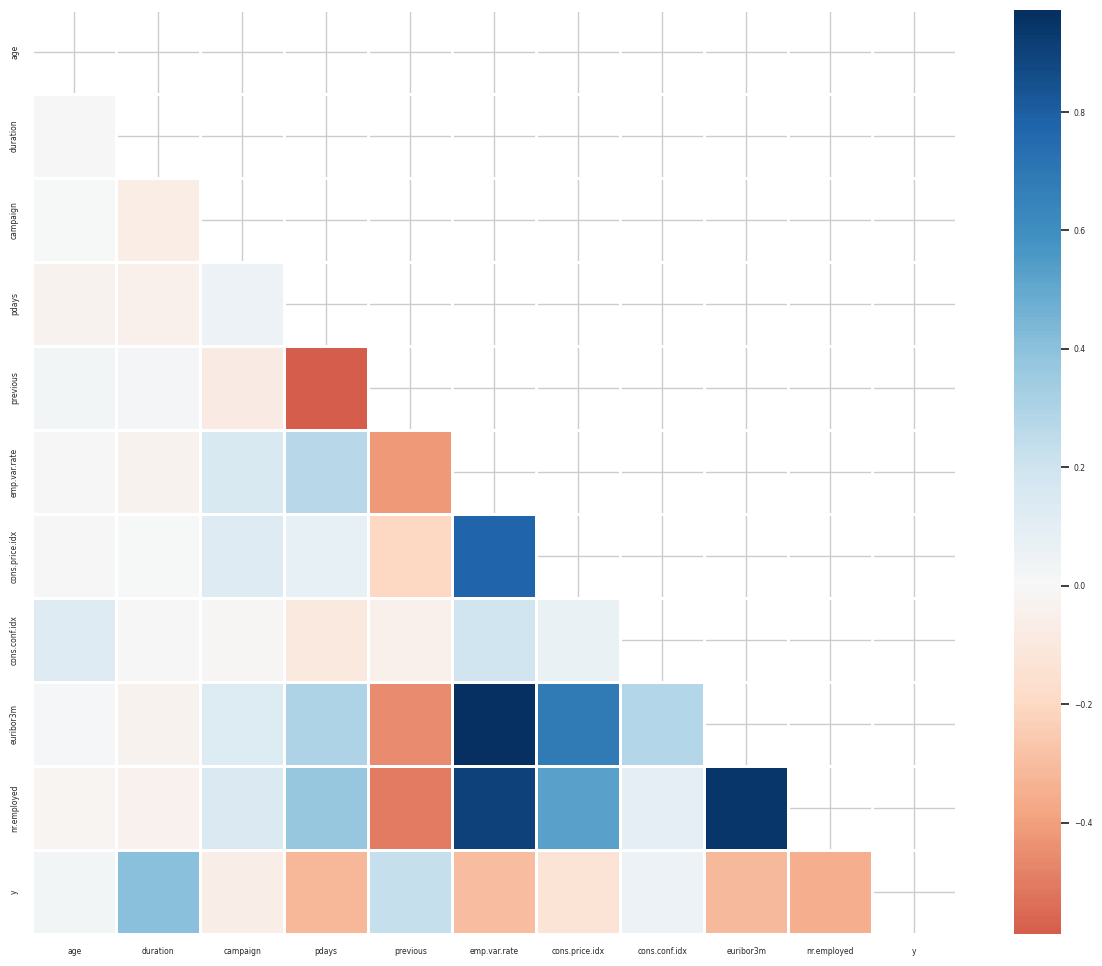

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(df.corr(),
            annot=False,
            mask = mask,
            cmap = 'RdBu',
            linewidths=.9,
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)

In [25]:
corr = df.corr()
for i in list(corr.columns):
    for j in list(corr.columns):
        if abs(corr.loc[i,j])>0.7 and corr.loc[i,j] != 1:
            print(i, '\t',j ,'\t', corr.loc[i,j])

emp.var.rate 	 cons.price.idx 	 0.7753341708348431
emp.var.rate 	 euribor3m 	 0.9722446711516167
emp.var.rate 	 nr.employed 	 0.9069701012560616
cons.price.idx 	 emp.var.rate 	 0.7753341708348431
euribor3m 	 emp.var.rate 	 0.9722446711516167
euribor3m 	 nr.employed 	 0.9451544313982757
nr.employed 	 emp.var.rate 	 0.9069701012560616
nr.employed 	 euribor3m 	 0.9451544313982757


<ipython-input-25-c369ff9a2968>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


## Label Encoding for Categorical to Numerical data

In [26]:
X = df.iloc[:, np.r_[0:19]].values
Y = df.iloc[:, 20].values
X

array([[56, 'housemaid', 'married', ..., 93.994, -36.4, 4.857],
       [57, 'services', 'married', ..., 93.994, -36.4, 4.857],
       [37, 'services', 'married', ..., 93.994, -36.4, 4.857],
       ...,
       [56, 'retired', 'married', ..., 94.767, -50.8, 1.028],
       [44, 'technician', 'married', ..., 94.767, -50.8, 1.028],
       [74, 'retired', 'married', ..., 94.767, -50.8, 1.028]],
      dtype=object)

In [27]:
Y

array([0, 0, 0, ..., 0, 1, 0])

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train

array([[40, 'blue-collar', 'married', ..., 93.918, -42.7, 4.96],
       [31, 'admin.', 'married', ..., 92.893, -46.2, 1.244],
       [59, 'retired', 'married', ..., 92.893, -46.2, 1.354],
       ...,
       [35, 'admin.', 'married', ..., 92.431, -26.9, 0.754],
       [40, 'management', 'married', ..., 93.994, -36.4, 4.856],
       [29, 'admin.', 'single', ..., 93.918, -42.7, 4.96]], dtype=object)

In [29]:
X_train.shape

(32950, 19)

In [30]:
Label_encoder_x = LabelEncoder()

for i in range(19):

  X_train[:,i] = Label_encoder_x.fit_transform(X_train[:,i])

for i in range(19):
  X_test[:,i] =  Label_encoder_x.fit_transform(X_test[:,i])

X_train

array([[23, 1, 1, ..., 17, 6, 301],
       [14, 0, 1, ..., 8, 4, 196],
       [42, 5, 1, ..., 8, 4, 214],
       ...,
       [18, 0, 1, ..., 2, 25, 77],
       [23, 4, 1, ..., 18, 16, 283],
       [12, 0, 2, ..., 17, 6, 301]], dtype=object)

In [31]:
X_test

array([[40, 9, 1, ..., 8, 4, 180],
       [38, 11, 1, ..., 18, 16, 238],
       [16, 1, 1, ..., 8, 4, 181],
       ...,
       [29, 2, 2, ..., 10, 3, 190],
       [14, 0, 2, ..., 17, 6, 253],
       [42, 0, 1, ..., 18, 16, 233]], dtype=object)

In [32]:
Label_encoder_y = LabelEncoder()
y_train = Label_encoder_y.fit_transform(y_train)
y_test = Label_encoder_y.fit_transform(y_test
                                       )

In [33]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

## Models with GridSearched Hyperparameter Tuning

In [34]:
!pip install --upgrade scikit-learn


In [35]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score, accuracy_score, log_loss

#### DECISION TREE

In [36]:
parameters = {'min_samples_split': [i*10 for i in range(0,10)], 'max_depth': [i for i in range(5, 10)],     'min_samples_leaf': [1, 2, 4]}
dtc = DecisionTreeClassifier(random_state = 12)

clf1 = GridSearchCV(dtc, parameters, cv=5, scoring='accuracy', verbose=5, n_jobs=-1)
result = clf1.fit(X_train, y_train.ravel())
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best: 0.912352 using {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 20}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
75 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

In [37]:
y_pred = clf1.predict(X_test)
x = (y_pred == y_test).sum()
print(x, 'Correct out of', len(y_pred))
print('Accuracy: ', x/len(y_pred))

7482 Correct out of 8238
Accuracy:  0.9082301529497451


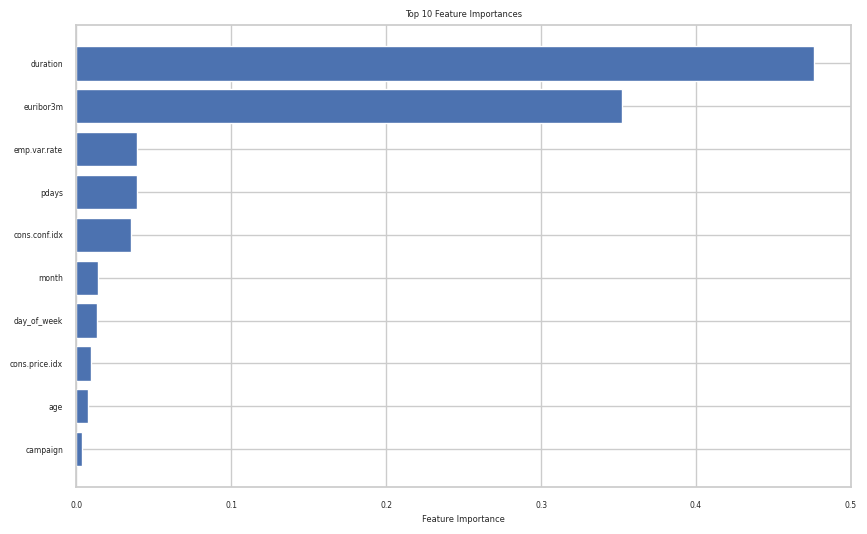

In [38]:
best_dtc = clf1.best_estimator_

# Get feature importances from the best trained model
feature_importances = best_dtc.feature_importances_

# Match feature importances with feature names (assuming you have feature names in X_train.columns)
importance_dict = dict(zip(df.columns[:-1], feature_importances))

# Sort feature importances in descending order
sorted_importance_dict = dict(sorted(importance_dict.items(), key=lambda x: x[1], reverse=True))

# Print or visualize feature importances

# Get the top 5 features
top_10_features = list(sorted_importance_dict.keys())[:10]
top_10_importances = list(sorted_importance_dict.values())[:10]

# Create a bar plot for the top 5 feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_10_features, top_10_importances)
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()

In [39]:
from sklearn import metrics

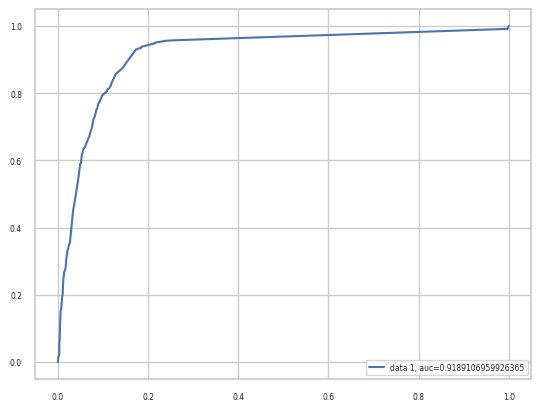

In [40]:
y_pred_proba = clf1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### RANDOM FOREST CLASSIFIER

too much time


In [41]:
"""
parameters = {'n_estimators': [i*10 for i in range(5, 25)], 'min_samples_split': [2, 5, 10, 20, 50, 100], 'max_depth': [i for i in range(5, 10)]}

rfc = RandomForestClassifier(random_state = 12)
clf2 = GridSearchCV(rfc, parameters, cv=5, scoring='accuracy', verbose=5, n_jobs=-1)
result = clf2.fit(X_train, y_train.ravel())
print("Best: %f using %s" % (result.best_score_, result.best_params_))
"""

'\nparameters = {\'n_estimators\': [i*10 for i in range(5, 25)], \'min_samples_split\': [2, 5, 10, 20, 50, 100], \'max_depth\': [i for i in range(5, 10)]}\n\nrfc = RandomForestClassifier(random_state = 12)\nclf2 = GridSearchCV(rfc, parameters, cv=5, scoring=\'accuracy\', verbose=5, n_jobs=-1)\nresult = clf2.fit(X_train, y_train.ravel())\nprint("Best: %f using %s" % (result.best_score_, result.best_params_))\n'

### Naive bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Define a range of hyperparameters to search
parameters = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Perform grid search with cross-validation
clf3 = GridSearchCV(estimator=gnb, param_grid=parameters, cv=5, scoring='accuracy', verbose=5, n_jobs=-1)
result = clf3.fit(X_train, y_train.ravel())

# Print the best accuracy and hyperparameters
print("Best accuracy: %f using %s" % (result.best_score_, result.best_params_))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best accuracy: 0.852686 using {'var_smoothing': 1e-09}


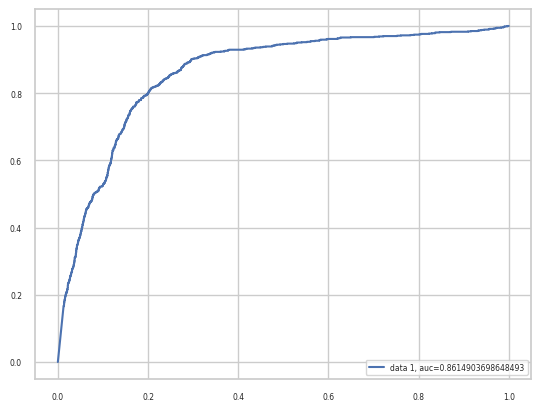

In [43]:
y_pred_proba = clf3.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

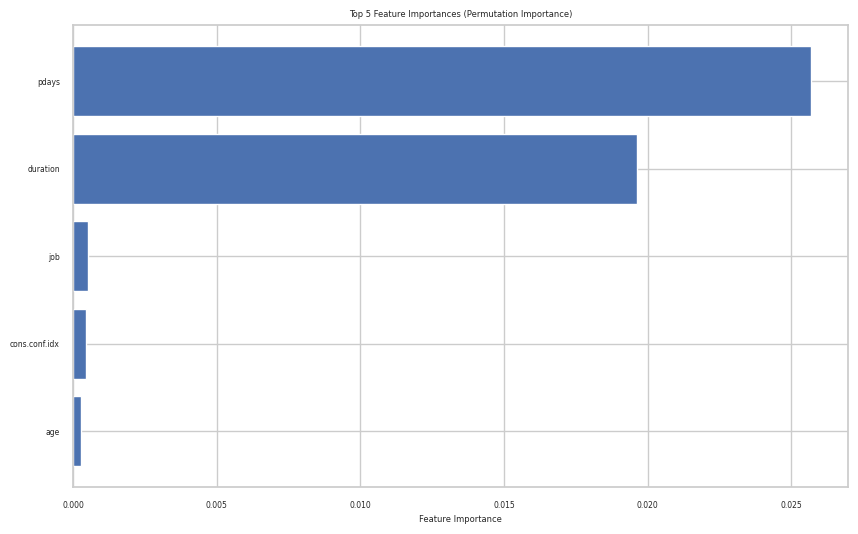

In [44]:
from sklearn.inspection import permutation_importance

# Assuming you have trained the Gaussian Naive Bayes classifier as clf3
# Use a validation dataset or X_test, y_test for this purpose
perm_importance = permutation_importance(clf3, X_test, y_test, n_repeats=30, random_state=12)

# Get feature importances
feature_importances = perm_importance.importances_mean

# Match feature importances with feature names
importance_dict = dict(zip(df.columns[:-1], feature_importances))

# Sort feature importances in descending order
sorted_importance_dict = dict(sorted(importance_dict.items(), key=lambda x: x[1], reverse=True))

# Get the top 5 features
top_5_features = list(sorted_importance_dict.keys())[:5]
top_5_importances = list(sorted_importance_dict.values())[:5]

# Create a bar plot for the top 5 feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_5_features, top_5_importances)
plt.xlabel('Feature Importance')
plt.title('Top 5 Feature Importances (Permutation Importance)')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()


### Logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create a Logistic Regression classifier
lr = LogisticRegression(max_iter=1000, random_state=12)

# Define a range of hyperparameters to search
parameters = {
    'penalty': ['l1', 'l2'],  # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1.0, 10.0]  # Inverse of regularization strength
}

# Perform grid search with cross-validation
clf4 = GridSearchCV(estimator=lr, param_grid=parameters, cv=5, scoring='accuracy', verbose=5, n_jobs=-1)
result = clf4.fit(X_train, y_train.ravel())

# Print the best accuracy and hyperparameters
print("Best accuracy: %f using %s" % (result.best_score_, result.best_params_))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

Best accuracy: 0.910592 using {'C': 10.0, 'penalty': 'l2'}


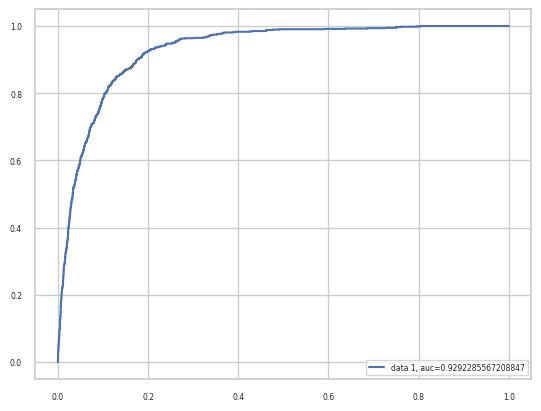

In [46]:
y_pred_proba = clf4.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

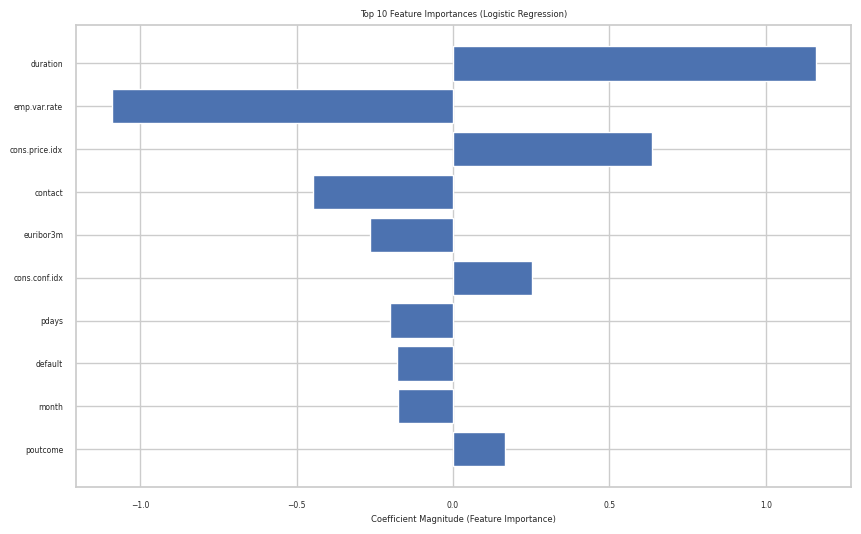

In [47]:
from sklearn.linear_model import LogisticRegression

# Assuming you've already trained the Logistic Regression classifier as clf4

# Get the coefficients (feature importances) from the best trained model
coefficients = clf4.best_estimator_.coef_[0]

# Match coefficients with feature names (assuming you have feature names in X_train.columns)
importance_dict = dict(zip(df.columns[:-1], coefficients))

# Sort feature importances by absolute value in descending order
sorted_importance_dict = dict(sorted(importance_dict.items(), key=lambda x: abs(x[1]), reverse=True))

# Get the top 5 features
top_10_features = list(sorted_importance_dict.keys())[:10]
top_10_importances = list(sorted_importance_dict.values())[:10]

# Create a bar plot for the top 5 feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_10_features, top_10_importances)
plt.xlabel('Coefficient Magnitude (Feature Importance)')
plt.title('Top 10 Feature Importances (Logistic Regression)')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()


#MODEL B

In [48]:
# Define the column names you want to include
selected_columns = ['duration', 'euribor3m', 'emp.var.rate', 'cons.conf.idx', 'cons.price.idx']

# Use loc to select the specified columns and convert to a NumPy array
Xb = df.loc[:, selected_columns].values


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Xb_train, Xb_test, y_train, y_test = train_test_split(Xb, Y, test_size=0.2, random_state=42)
Xb_train

array([[ 94.   ,   4.96 ,   1.4  , -42.7  ,  93.918],
       [116.   ,   1.244,  -1.8  , -46.2  ,  92.893],
       [ 13.   ,   1.354,  -1.8  , -46.2  ,  92.893],
       ...,
       [194.   ,   0.754,  -3.4  , -26.9  ,  92.431],
       [295.   ,   4.856,   1.1  , -36.4  ,  93.994],
       [333.   ,   4.96 ,   1.4  , -42.7  ,  93.918]])

### Support Vector Machine


In [49]:
from sklearn.svm import SVC

# Initialize and train SVM model
svm_model = SVC()
svm_model.fit(Xb_train, y_train)

# Predict
y_pred_svm = svm_model.predict(Xb_test)

# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM Model:", svm_accuracy)


Accuracy of SVM Model: 0.896091284292304


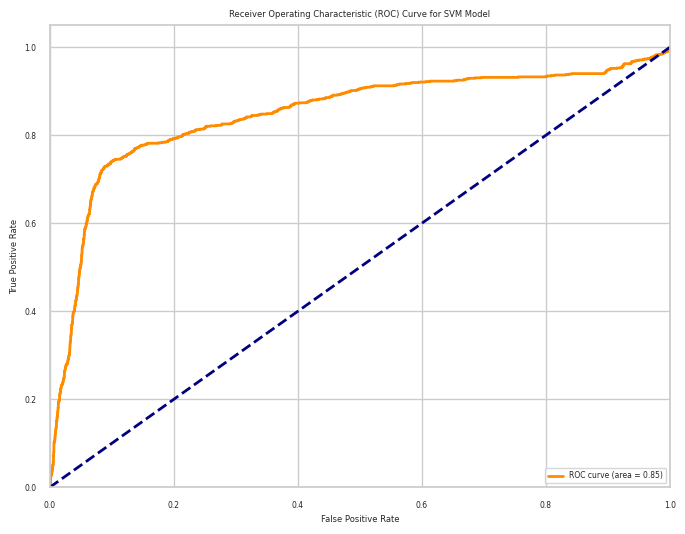

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities instead of class labels for ROC curve
y_pred_svm_proba = svm_model.decision_function(Xb_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm_proba)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_svm_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM Model')
plt.legend(loc='lower right')
plt.show()


### Multi Layer Perceptron (NN)

In [52]:
from sklearn.neural_network import MLPClassifier

# Initialize and train NN model
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
nn_model.fit(Xb_train, y_train)

# Predict
y_pred_nn = nn_model.predict(Xb_test)

# Evaluate NN model
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print("Accuracy of NN Model:", nn_accuracy)


Accuracy of NN Model: 0.8980335032774945


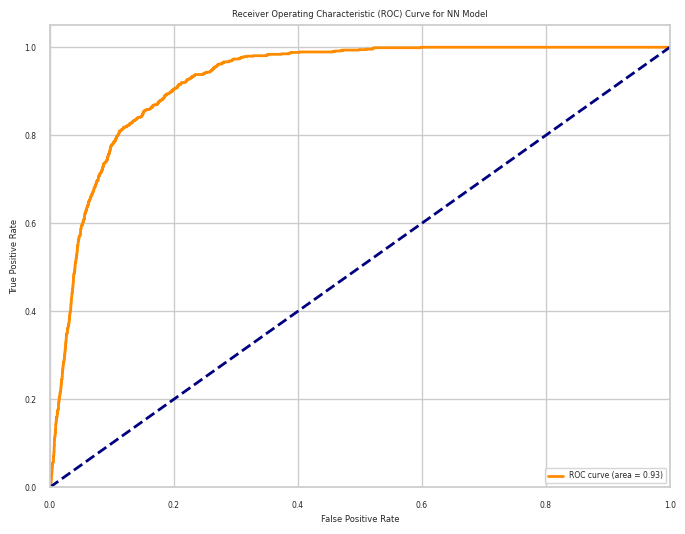

In [53]:

# Predict probabilities instead of class labels for ROC curve
y_pred_nn_proba = nn_model.predict_proba(Xb_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nn_proba)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_nn_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for NN Model')
plt.legend(loc='lower right')
plt.show()

###### Redundant case -- DT and LR

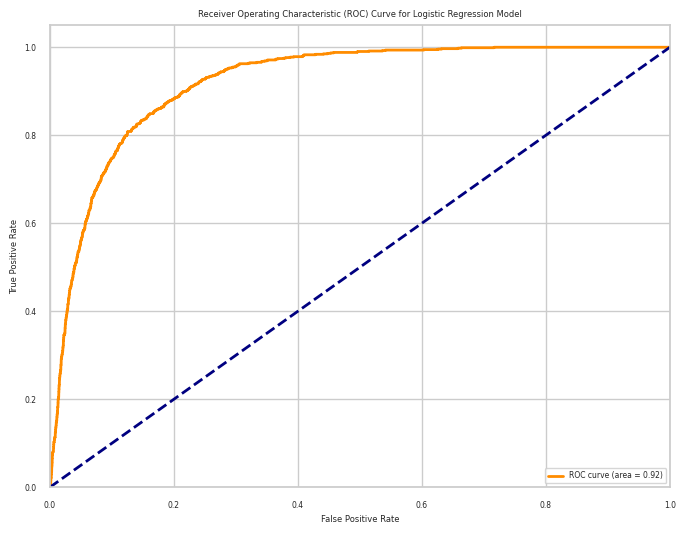

Accuracy of Logistic Regression Model: 0.9049526584122359


In [54]:
#LR
# Initialize and train Logistic Regression model
lr_model = LogisticRegression(C=10.0, penalty='l2')
lr_model.fit(Xb_train, y_train)

# Predict probabilities instead of class labels for ROC curve
y_pred_lr_proba = lr_model.predict_proba(Xb_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr_proba)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_lr_proba)

# Calculate accuracy
y_pred_lr = lr_model.predict(Xb_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression Model')
plt.legend(loc='lower right')
plt.show()

# Print accuracy
print("Accuracy of Logistic Regression Model:", lr_accuracy)


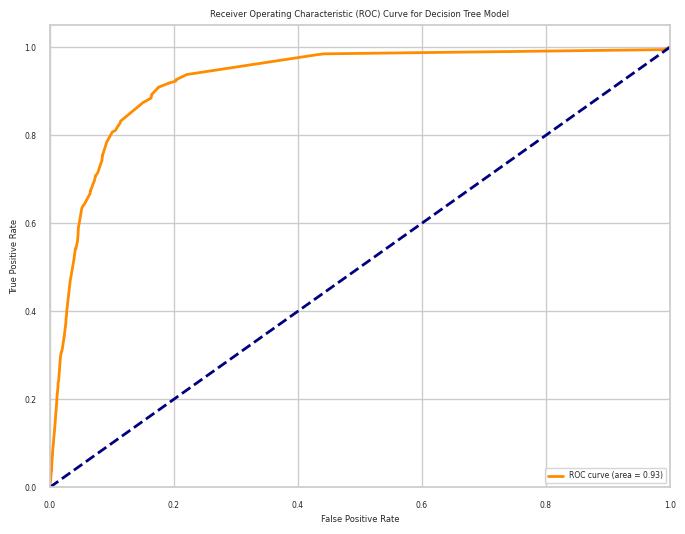

Accuracy of Decision Tree Model: 0.9128429230395727


In [56]:
#DT
# Initialize and train Decision Tree model with the specified hyperparameters
dt_model = DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=20)
dt_model.fit(Xb_train, y_train)

# Predict probabilities instead of class labels for ROC curve
y_pred_dt_proba = dt_model.predict_proba(Xb_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt_proba)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_dt_proba)

# Calculate accuracy
y_pred_dt = dt_model.predict(Xb_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree Model')
plt.legend(loc='lower right')
plt.show()

# Print accuracy
print("Accuracy of Decision Tree Model:", dt_accuracy)


